# **Vanilla Autoencoder?**

A Vanilla Autoencoder is a basic type of neural network architecture used for unsupervised learning. It consists of an encoder that compresses input data into a lower-dimensional representation and a decoder that reconstructs the original data from this representation. The primary goal is to learn a compact and efficient representation of the input data through the training process, which involves minimizing the difference between the input and the reconstructed output. The term "vanilla" implies simplicity, as it represents the fundamental structure of an autoencoder without additional complexities or modifications.

# Architecture of Vanilla Autoencoder?

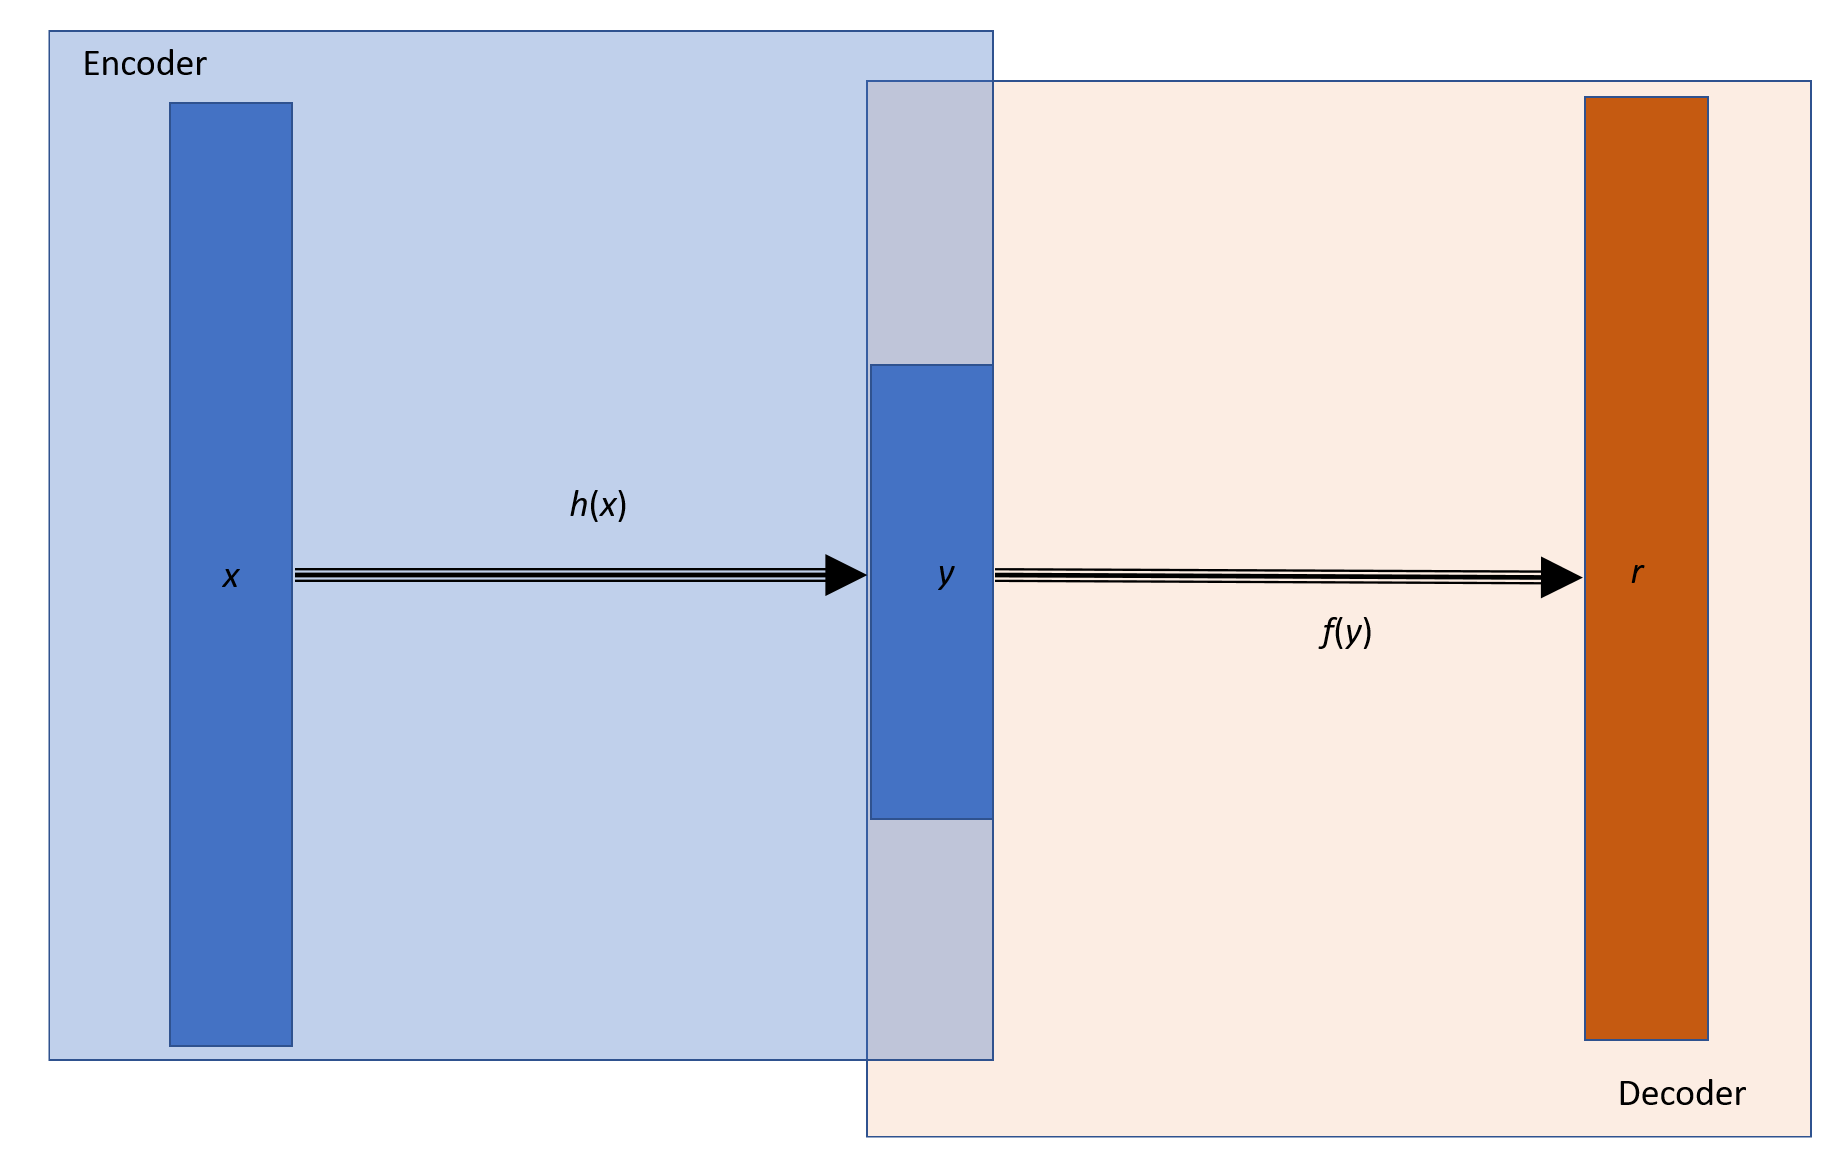

In [2]:
from IPython.display import Image
Image(filename='images/VA.png')

The architecture of a Vanilla Autoencoder consists of two main components: an encoder and a decoder. The primary purpose is to learn a compressed representation of the input data and then reconstruct the original data from this representation. Here's a brief explanation of the architecture:

1. **Encoder:**
   - **Input Layer:** Represents the input features.
   - **Hidden Layers:** Successive layers with a reduction in the number of neurons.
   - **Bottleneck Layer:** The last hidden layer, also known as the coding layer, has the smallest number of neurons and represents the compressed form of the input data.

2. **Decoder:**
   - **Bottleneck Layer (Mirror Image):** The coding layer of the encoder is mirrored in the decoder.
   - **Hidden Layers (Mirror Image):** Successive layers with an increase in the number of neurons.
   - **Output Layer:** Represents the reconstructed input data, with the number of neurons matching the input features.

The encoder transforms the input data into a compressed representation in the bottleneck layer, and the decoder reconstructs the original data from this representation. The training process involves adjusting the model's weights to minimize the difference between the input and the reconstructed output, typically measured using a loss function like Mean Squared Error (MSE). The goal is to learn a compact representation that captures the essential features of the input data.

# Key Characteristics?

Vanilla Autoencoders have several key characteristics:

1. **Simplicity**: They are the simplest form of autoencoders with just an input layer, a hidden layer (encoding layer), and an output layer (decoding layer).

2. **Data-specific**: They are designed to be specific to the data they are trained on. This means they will not encode well for data that is significantly different from the training data.

3. **Lossy**: The reconstruction of the input data will not be perfect and will be lossy. This is because the goal of the autoencoder is to capture the most important features of the data.

4. **Unsupervised Learning**: They are trained using unsupervised learning, meaning they don't require explicit labels to learn from the data. They learn to encode the input data and then decode it back by minimizing the reconstruction error.

5. **Bottleneck**: The hidden layer (encoding layer) is smaller than the input layer, creating a bottleneck. This forces the autoencoder to learn a compressed representation of the input data.

6. **Non-linear transformations**: Vanilla autoencoders use non-linear transformations for both encoding and decoding steps.

7. **Usage**: They are often used for dimensionality reduction, feature extraction, and learning generative models of data.

# Python VCode Implementation:

Here's a simple implementation of a Vanilla Autoencoder using Python and Keras. This example assumes you're working with images of size 28x28 (such as the MNIST dataset), and it compresses them into a 32-dimensional vector.



In [3]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# prepare input data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# train autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

2023-12-26 19:07:33.334736: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-26 19:07:33.810517: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-26 19:07:33.813507: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-26 19:07:36.205312: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-26 19:07:41.806558: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-12-26 19:07:42.674978: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50
233/235 [============================>.] - ETA: 0s - loss: 0.6960

2023-12-26 19:07:46.748655: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2023-12-26 19:07:46.843704: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


235/235 [==============================] - 4s 12ms/step - loss: 0.6960 - val_loss: 0.6959
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6958 - val_loss: 0.6958
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6956 - val_loss: 0.6956
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6954 - val_loss: 0.6954
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6953 - val_loss: 0.6952
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6951 - val_loss: 0.6950
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6949 - val_loss: 0.6949
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6944 - val_loss: 0.6944




In this code, we first define the architecture of the autoencoder with an input layer, an encoding layer, and a decoding layer. We then compile the model with the Adadelta optimizer and the binary cross-entropy loss function. After preparing the input data, we train the autoencoder to reconstruct the input images.

# How can I visualize the encoded representations learned by a Vanilla Autoencoder?

To visualize the encoded representations learned by the Vanilla Autoencoder, you can use the `encoder` model to predict the encoded representation of the test data, and then plot these representations. 

Here's how you can do it:



2023-12-26 19:11:34.740398: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step


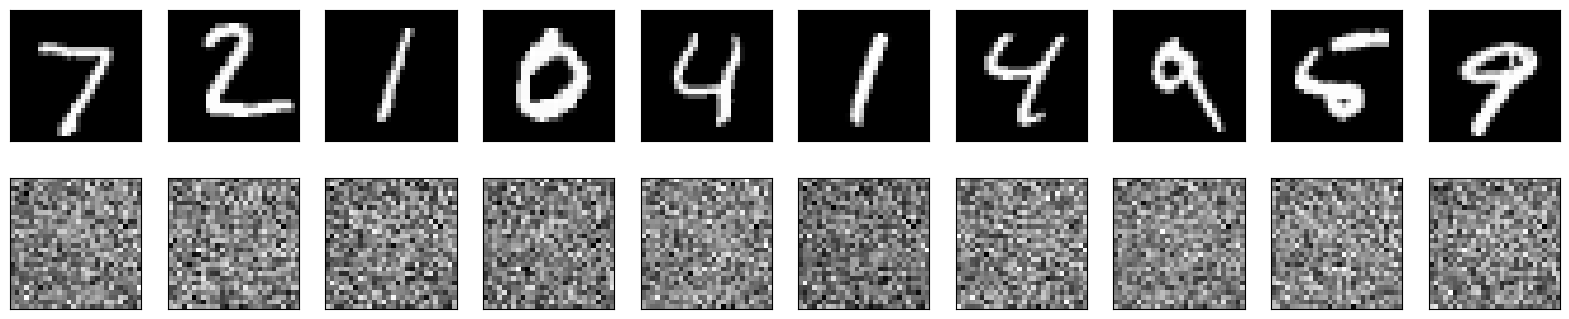

In [4]:
import matplotlib.pyplot as plt

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



This code will display the original images in the top row and the reconstructed images in the bottom row. You can see how well the autoencoder is able to reconstruct the original images from the encoded representations.

# How can I use a Vanilla Autoencoder for dimensionality reduction?

A Vanilla Autoencoder can be used for dimensionality reduction by training the autoencoder on the data and then using the encoder part of the autoencoder to transform the high-dimensional input data into a lower-dimensional form.

Here's a simple example of how you can do this:



In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# prepare input data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# train autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# use the encoder to reduce the dimensionality of the data
x_test_encoded = encoder.predict(x_test)



In this code, `x_test_encoded` will be a lower-dimensional representation of `x_test`. You can use this lower-dimensional data for further analysis or visualization. The dimensionality of the data is reduced from 784 to the `encoding_dim` (32 in this case).

# How can I use a Vanilla Autoencoder for anomaly detection?

A Vanilla Autoencoder can be used for anomaly detection by training the autoencoder on the normal data and then using the reconstruction error to detect anomalies. The idea is that the autoencoder will learn to reconstruct normal data well, but it will have a high reconstruction error for anomalous data.

Here's a simple example of how you can do this:



In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import mean_squared_error

# this is the size of our encoded representations
encoding_dim = 32  

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# prepare input data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# train autoencoder on normal data
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# use the autoencoder to reconstruct the test data
x_test_decoded = autoencoder.predict(x_test)

# compute the mean squared error between the test data and their reconstructions
mse = np.mean(np.power(x_test - x_test_decoded, 2), axis=1)

# anomalies are instances with a reconstruction error greater than a certain threshold
threshold = np.quantile(mse, 0.99)  # adjust this value based on your understanding of the data
anomalies = x_test[mse > threshold]



In this code, `anomalies` will be the instances in `x_test` that the autoencoder considers to be anomalies. The threshold for considering an instance to be an anomaly is set to be the 99th percentile of the reconstruction errors on the test data, but you can adjust this value based on your understanding of the data.

# Application?

Vanilla Autoencoders have several applications in the field of machine learning and data science:

1. **Dimensionality Reduction**: Autoencoders can be used to reduce the dimensionality of data by learning a compressed representation of the input data. This can be useful for visualizing high-dimensional data or for preprocessing data before feeding it into another machine learning model.

2. **Anomaly Detection**: Autoencoders can be used for anomaly detection by training the autoencoder on normal data and then using the reconstruction error to detect anomalies. The idea is that the autoencoder will learn to reconstruct normal data well, but it will have a high reconstruction error for anomalous data.

3. **Denoising**: Autoencoders can be used to remove noise from data. This is done by training the autoencoder on noisy data as input and clean data as output. The autoencoder will learn to map from the noisy data to the clean data, effectively learning to remove the noise.

4. **Feature Extraction**: The encoded representations learned by an autoencoder can be used as features for another machine learning model. These features can sometimes capture useful information that is not easily accessible from the raw data.

5. **Data Generation**: Although not typically used for this purpose, autoencoders can potentially be used to generate new data that is similar to the training data by sampling random points in the latent space and decoding these points. However, other types of models like Variational Autoencoders or Generative Adversarial Networks are usually better suited for this task.

# **Thank You!**